In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

The Fresnel kernel function can be represented mathematically as:

$$
\text{fresnel\_kernel}(z, \lambda, x) = e^{i \frac{2 \pi}{\lambda} z} \cdot e^{i \frac{2 \pi}{\lambda} \frac{x^2}{2z}}
$$

where:
- \(z\) is the distance from the source to the screen,
- \(\lambda\) is the wavelength, and
- \(x\) is the position on the screen.

In [4]:
def fresnel_kernel (z, lambda_, x): #z is the distance from the source to the screen, lambda_ is the wavelength, and x is the position on the screen
    k = 2 * np.pi / lambda_
    return np.exp(1j * k * z) * np.exp(1j * k * x**2 / (2 * z))

The Fresnel transform function can be defined as:

$$
\text{fresnel\_transform}(signal, z, \lambda, dx) = \text{ifft}(\text{fft}(signal) \cdot \text{fft}(\text{fresnel\_kernel}(z, \lambda, x)))
$$

where:
- `signal` is the input signal,
- `z` is the distance from the source to the screen,
- `\lambda` is the wavelength, and
- `dx` is the position on the screen.

In [5]:
def fresnel_transform (signal, z, lambda_, dx): #signal is the input signal, z is the distance from the source to the screen, lambda_ is the wavelength, and dx is the position on the screen
    N = len(signal)
    x = np.arange(-N/2, N/2) * dx
    kernel = fresnel_kernel(z, lambda_, x)
    signal_fft = fft(signal)
    kernel_fft = fft(kernel)
    return ifft(signal_fft * kernel_fft)

In [15]:
lambda_ = 1.24e-10 #10 keV X-rays
z = 3.6 #distance from the source to the screen in meters
dx = 1e-6 #position on the screen or spatial sampling interval in meters

In [10]:
# # create a signal
# N = 1000
# x = np.arange(-N/2, N/2) * dx
# # signal = np.exp(-x**2 / (2 * (10 * dx)**2))
# A = 1
# f = 50
# phi = 0
# signal = A * np.sin(2 * np.pi * f * x + phi)
# print(max(signal))
# ----------------------------------------------------

# # Input signal (sinusoidal wave)
# N = 1024  # Number of points in the signal
# x = np.arange(-N/2, N/2) * dx  # Spatial sampling
# A = 1  # Amplitude of the sinusoidal wave
# f = 50  # Frequency of the sinusoidal wave
# phi = 0  # Phase shift of the sinusoidal wave
# signal = A * np.sin(2 * np.pi * f * x   + phi)
# print(max(signal))

# ----------------------------------------------------

# Fs = 1024 # sampling rate
# f = 5 # frequency
# sample = 8000 # number of sample
# x = np.arange(sample) # the points on the x axis for plotting
# signal = np.sin(2 * np.pi * f * x / Fs)
# print(max(signal))
# plt.plot(x, y)
# plt.xlabel('sample(n)')
# plt.ylabel('voltage(V)')
# plt.show()
# ----------------------------------------------------


N = 1000
x = np.arange(-N/2, N/2) * dx
detector_size = 800e-6
aperture_diameter = 40e-6 # 1e-3 # 1e-6
position_x = np.linspace(-detector_size/2, detector_size/2, N)
xoffset = position_x[0]
x_delta = position_x[1] - position_x[0]

signal = np.ones(N) + 0j
signal[np.where(position_x < -aperture_diameter/2)] = 0.0
signal[np.where(position_x > aperture_diameter/2)] = 0.0


In [16]:
fresnel_signal = fresnel_transform(signal, z, lambda_, dx)

In [17]:
# Perform convolution with a kernel ( another fresnel transform or a custom kernel)
# using a simple gaussian kernel for now
kernel = np.exp(-x**2 / (2 * (10e-3)**2))

conv_result = fresnel_transform(fresnel_signal, z, lambda_, dx)

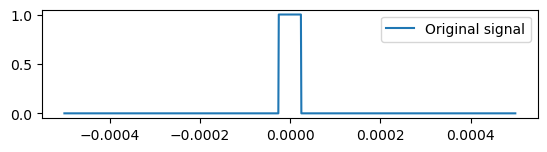

In [18]:
# plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(x,signal, label='Original signal')
plt.legend()
plt.show()

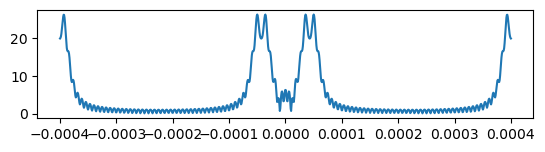

In [19]:
plt.subplot(3, 1, 2)
plt.plot(position_x, np.abs(fresnel_signal), label='Fresnel transform')

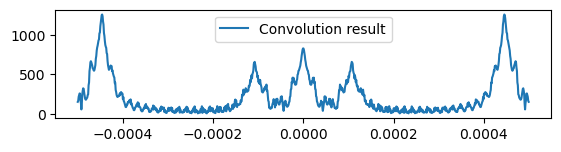

In [20]:
plt.subplot(3, 1, 3)
plt.plot(x, np.abs(conv_result), label='Convolution result')
plt.legend()

In [21]:
import wave

In [22]:
sound = wave.open('chord-C.wav', 'rb')
sound

In [23]:
print(sound.readframes(10))

b'\x95\x0fu&\xc7\r\x12\xf3>\x0b\x81\xfe\x0e\xe8\x02\xf3b\xf4r\xe1'


In [24]:
n_frames = sound.getnframes()
frames = sound.readframes(n_frames)
samples = np.frombuffer(frames, dtype=np.int16)
print(samples)

[-8694 -5707 -4397 ...     0     0     0]


In [25]:
len(samples)


15990

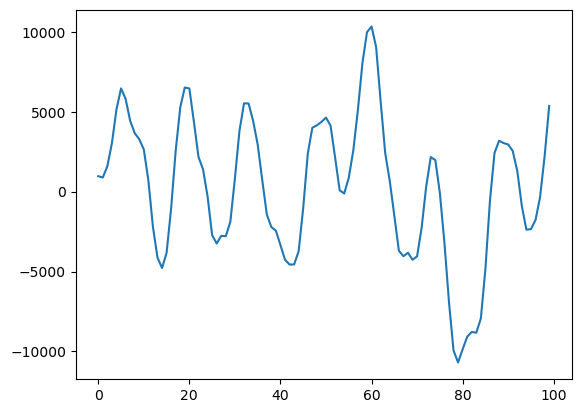

In [26]:
plt.plot(samples[7000: 7100])
plt.show()


174595.8949611766

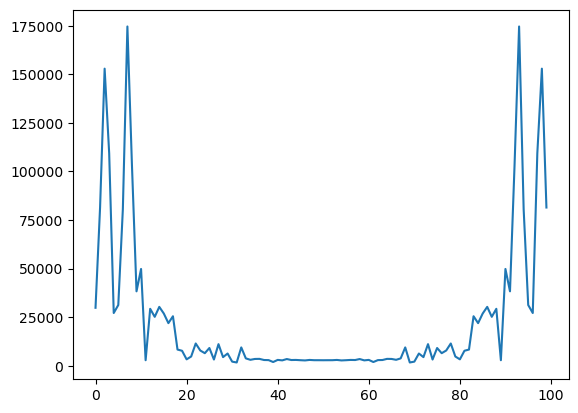

In [28]:
signal_fft = fft(samples[7000: 7100])
plt.plot(np.abs(signal_fft))
max(np.abs(signal_fft))